#### Prepare notebook with relevant modules

In [1]:
%pip install -U odp-sdk --quiet 2>/dev/null

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from ODPworkspace_demotools import mapOQS, pydeck_plot
from odp_sdk.client import OdpClient # The SDK

In [3]:
client = OdpClient()

## Geospatial query of PGS data
- Either define a polygon manually
- Or use the interactive map to create a polygon

### Use a map to create a geospatial query for the API call
- Click on the 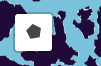 button to create a polygon for the query
- The data in this notebook is available offshore Brazil, so create a polygon there.

In [4]:
query_geometry = mapOQS()

Or define the query geometry manually (just remove the '#' and edit coordinates below)

In [6]:
#query_geometry.value = "POLYGON((-37.397 -11.953, -35.640 -9.015, -32.256 -10.272, -36.079 -16.678, -37.397 -11.953))"

### Get data identifiers from catalog

In [7]:
adcp_dataset = client.catalog.get(("c85fa191-3256-41f3-8c6d-3e73f14c0f49"))
adcp_dataset.metadata.display_name

'PGS physics data - ADCP current measurements - aggregated'

In [8]:
CTD_dataset = client.catalog.get(("861f086f-776b-406c-af0e-9062dfd91f1c"))
CTD_dataset.metadata.display_name

'PGS physics data - CTD profiles - aggregated'

In [9]:
biota_dataset = client.catalog.get(("c571f34a-490e-4a23-97ef-81c9efa41558"))
biota_dataset.metadata.display_name

'PGS biota data - mammal and turtle observations - aggregated'

### Request geospatially filtered data from ODP API

In [12]:
biota_data = client.tabular.select_as_list(biota_dataset, filter_query={'#ST_WITHIN': ['$geometry', query_geometry.value]}, limit=10000)

In [10]:
adcp_data = client.tabular.select_as_list(adcp_dataset, filter_query={'#ST_WITHIN': ['$geometry', query_geometry.value]}, limit=10000)

In [11]:
CTD_data = client.tabular.select_as_list(CTD_dataset, filter_query={"#AND": [{'#ST_WITHIN': ['$geometry', query_geometry.value]},{"#LESS_THAN": ["$Depth_m", 5]}]}, limit=10000)

## Visualize data

### Plot datapoints from query on a map

In [13]:
pydeck_plot([adcp_data[99::100], CTD_data, biota_data], pickable=True, zoom=3, lat=-2, lon=-35)

{
  "initialViewState": {
    "latitude": -2,
    "longitude": -35,
    "zoom": 3
  },
  "layers": [
    {
      "@@type": "GeoJsonLayer",
      "data": [
        {
          "DatetimeUtc": "2014-06-09 15:29:12",
          "ProjectNumber": 2013121.0,
          "cur_e_ms-1": 0.654823529411765,
          "cur_n_ms-1": 0.0640672268907563,
          "depth_m": 25.0,
          "geometry": {
            "coordinates": [
              -36.163518,
              -10.931282
            ],
            "type": "Point"
          }
        },
        {
          "DatetimeUtc": "2014-06-11 08:17:00",
          "ProjectNumber": 2013121.0,
          "cur_e_ms-1": 0.328844537815126,
          "cur_n_ms-1": 0.186180672268908,
          "depth_m": 25.0,
          "geometry": {
            "coordinates": [
              -36.175663,
              -10.934036
            ],
            "type": "Point"
          }
        },
        {
          "DatetimeUtc": "2014-06-15 00:02:54",
          "ProjectNumber": 2013121.0,
          "cur_e_ms-1": 0.459344537815126,
          "cur_n_ms-1": 0.319021008403361,
          "depth_m": 25.0,
          "geometry": {
            "coordinates": [
              -36.404753,
              -10.838327
            ],
            "type": "Point"
          }
        },
        {
          "DatetimeUtc": "2014-06-16 00:47:12",
          "ProjectNumber": 2013121.0,
          "cur_e_ms-1": 0.643949579831933,
          "cur_n_ms-1": 0.13927731092437,
          "depth_m": 25.0,
          "geometry": {
            "coordinates": [
              -36.121542,
              -10.940023
            ],
            "type": "Point"
          }
        },
        {
          "DatetimeUtc": "2014-06-17 15:43:40",
          "ProjectNumber": 2013121.0,
          "cur_e_ms-1": 0.418325396825397,
          "cur_n_ms-1": 0.29281746031746,
          "depth_m": 25.0,
          "geometry": {
            "coordinates": [
              -36.215496,
              -10.86047
            ],
            "type": "Point"
          }
        },
        {
          "DatetimeUtc": "2014-06-18 10:20:07",
          "ProjectNumber": 2013121.0,
          "cur_e_ms-1": 0.823515873015873,
          "cur_n_ms-1": 0.326011904761905,
          "depth_m": 25.0,
          "geometry": {
            "coordinates": [
              -36.353289,
              -10.811247
            ],
            "type": "Point"
          }
        },
        {
          "DatetimeUtc": "2014-06-19 13:57:07",
          "ProjectNumber": 2013121.0,
          "cur_e_ms-1": 0.403492063492064,
          "cur_n_ms-1": -0.0115912698412698,
          "depth_m": 25.0,
          "geometry": {
            "coordinates": [
              -36.112462,
              -10.930359
            ],
            "type": "Point"
          }
        },
        {
          "DatetimeUtc": "2014-06-21 07:26:49",
          "ProjectNumber": 2013121.0,
          "cur_e_ms-1": 0.151698841698842,
          "cur_n_ms-1": -0.140528957528958,
          "depth_m": 25.0,
          "geometry": {
            "coordinates": [
              -36.129689,
              -10.92705
            ],
            "type": "Point"
          }
        },
        {
          "DatetimeUtc": "2014-06-23 05:29:46",
          "ProjectNumber": 2013121.0,
          "cur_e_ms-1": 0.420964285714286,
          "cur_n_ms-1": 0.102142857142857,
          "depth_m": 25.0,
          "geometry": {
            "coordinates": [
              -36.287816,
              -10.827335
            ],
            "type": "Point"
          }
        },
        {
          "DatetimeUtc": "2014-06-24 04:12:05",
          "ProjectNumber": 2013121.0,
          "cur_e_ms-1": 0.240528957528958,
          "cur_n_ms-1": -0.133111969111969,
          "depth_m": 25.0,
          "geometry": {
            "coordinates": [
              -36.104932,
              -10.920369
            ],
            "type": "Point"
          }
        },
        {
          "DatetimeUtc": "2014-06-26 01:55:5

### Visualize dataframes

In [14]:
pd.DataFrame(adcp_data[99::100]).head()

,DatetimeUtc,geometry,cur_n_ms-1,ProjectNumber,depth_m,cur_e_ms-1
0,2014-06-09 15:29:12,"{'type': 'Point', 'coordinates': [-36.163518, ...",0.064067,2013121.0,25.0,0.654824
1,2014-06-11 08:17:00,"{'type': 'Point', 'coordinates': [-36.175663, ...",0.186181,2013121.0,25.0,0.328845
2,2014-06-15 00:02:54,"{'type': 'Point', 'coordinates': [-36.404753, ...",0.319021,2013121.0,25.0,0.459345
3,2014-06-16 00:47:12,"{'type': 'Point', 'coordinates': [-36.121542, ...",0.139277,2013121.0,25.0,0.643950
4,2014-06-17 15:43:40,"{'type': 'Point', 'coordinates': [-36.215496, ...",0.292817,2013121.0,25.0,0.418325


In [15]:
pd.DataFrame(CTD_data).head()

,Project,geometry,Velocity_ms-1,DatetimeUtc,Conduct_mS/cm,Depth_m,Temp_C,Density_sigma-T,Pressure_dBar,Salinity_ppm,ProfileName,@@end
0,SEAL - Sergipe/Alagoas,"{'type': 'Point', 'coordinates': [-35.483333, ...",1540.57,2018-06-25 11:12:22,56.99,1.86,27.052,23.664,0.0,36.26,2018033_TS_Dips.xlsm_Profile # 4,NaN
1,SEAL - Sergipe/Alagoas,"{'type': 'Point', 'coordinates': [-35.483333, ...",1541.50,2018-06-25 11:12:24,58.15,3.45,27.064,24.288,0.0,37.09,2018033_TS_Dips.xlsm_Profile # 4,NaN
2,SEAL - Sergipe/Alagoas,"{'type': 'Point', 'coordinates': [-35.483333, ...",1541.51,2018-06-25 11:12:26,58.16,3.18,27.070,24.287,0.0,37.09,2018033_TS_Dips.xlsm_Profile # 4,NaN
3,SEAL - Sergipe/Alagoas,"{'type': 'Point', 'coordinates': [-35.866667, ...",1540.39,2018-06-29 12:17:29,57.77,2.07,26.502,24.596,0.0,37.27,2018033_TS_Dips.xlsm_Profile # 5,NaN
4,SEAL - Sergipe/Alagoas,"{'type': 'Point', 'coordinates': [-35.866667, ...",1540.38,2018-06-29 12:17:31,57.75,2.47,26.503,24.586,0.0,37.25,2018033_TS_Dips.xlsm_Profile # 5,NaN


In [16]:
pd.DataFrame(biota_data).head()

,Species,Family,Juveniles,Duration,geometry,Adults,Bathymetry,DateTimeStartedGMT-3,Acoustic,@@end
0,Stenella attenuata,Odontoceti,0.0,9.0,"{'type': 'Point', 'coordinates': [-36.0191, -1...",1.0,868.0,2018-06-11 06:36:00,False,NaN
1,Cetáceo grande porte,NI,1.0,18.0,"{'type': 'Point', 'coordinates': [-35.21415, -...",1.0,3878.0,2018-06-30 07:38:00,False,NaN
2,Megaptera novaeangliae,Mysticeti,0.0,53.0,"{'type': 'Point', 'coordinates': [-35.294117, ...",1.0,3804.0,2018-06-30 15:23:00,False,NaN
3,Megaptera novaeangliae,Mysticeti,0.0,45.0,"{'type': 'Point', 'coordinates': [-35.868617, ...",1.0,2861.0,2018-07-16 08:09:00,False,NaN
4,Megaptera novaeangliae,Mysticeti,0.0,22.0,"{'type': 'Point', 'coordinates': [-36.076167, ...",1.0,2133.0,2018-07-20 12:38:00,False,NaN


### Plot detailed CTD data

In [20]:
CTD_data_long = client.tabular.select_as_list(CTD_dataset, filter_query={'#ST_WITHIN': ['$geometry', query_geometry.value]}, limit=50000)

In [21]:
CTD_df = pd.DataFrame(CTD_data_long)

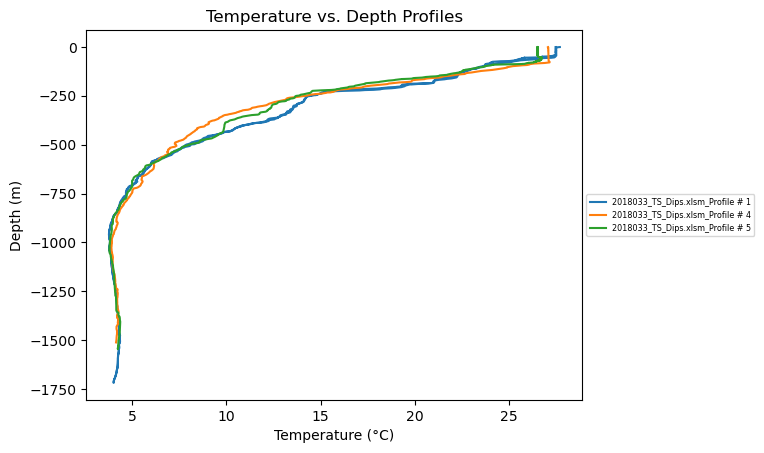

In [22]:
groupedCTD = CTD_df.groupby('ProfileName')
for name, group in groupedCTD:
    plt.plot(group['Temp_C'], group['Depth_m']*-1, label=name)
plt.xlabel('Temperature (°C)')
plt.ylabel('Depth (m)')
plt.title('Temperature vs. Depth Profiles')
plt.legend(fontsize='xx-small', loc='center left', bbox_to_anchor=(1, 0.5))  # Set the legend font size to 'small'
plt.show()